# John Gomes Project 1

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lu_factor, lu_solve

In [8]:
#parameters

L=1 #domain y-length, defined above in BCs
X_total=1  #independent var length
Ny=50  #y partitions
Nx=5000 #x partitions, adjust to 50 for r=48
source_coeff=2 #2 on RHS of PDE
alpha=2 #d^2u/dy^2 coeff
dy=L/(Ny-1)
dx=X_total/Nx
y=np.linspace(0,L,Ny)

r=(alpha*dx)/(2*dy**2) #general r form for modularity
print(r)
y_an=np.linspace(0,L,100) #define for analytical sol
N_int=Ny-2

0.4802000000000001


In [9]:
#Solving A, Au=b
A = np.zeros((N_int, N_int))
for i in range(N_int):  #create tri-diag mentioned in report
    A[i, i] = 1+2*r
    if i > 0:
        A[i, i-1] = -r
    if i < N_int - 1:
        A[i, i+1] = -r
lu, piv = lu_factor(A) #lu decomp tool from scipy.linalg- Google Gemini aided with this

In [11]:
u = np.zeros(Ny)  #IC of u(0, y) = 0
x_vals = [100,300,1800,4000]  # x-steps to store numerical sols
u_store_numer = {}
u_analytical = {}

for n in range(1, Nx + 1):
    #Solving b, Au=b
    b = (r*u[:-2]+(1-2*r)*u[1:-1]+r*u[2:]+source_coeff*dx) #b equation mentioned in report
    
    u[1:-1] = lu_solve((lu, piv), b) #lu_solve tool from scipy.linalg- Google Gemini aided with this

    if n in x_vals:
        x_now = n * dx #analytical sol at a given x val
        u_store_numer[n] = u.copy() #store solution
        u_an = np.zeros_like(y_an)
        for k in range(1, 201, 2):  #100 terms
            sol_summation = (4/(k**3*np.pi**3))*(1-np.exp(-2*k**2*np.pi**2*x_now))*np.sin(k*np.pi*y_an) #long form eqn from report
            u_an += sol_summation
        u_analytical[n] = u_an

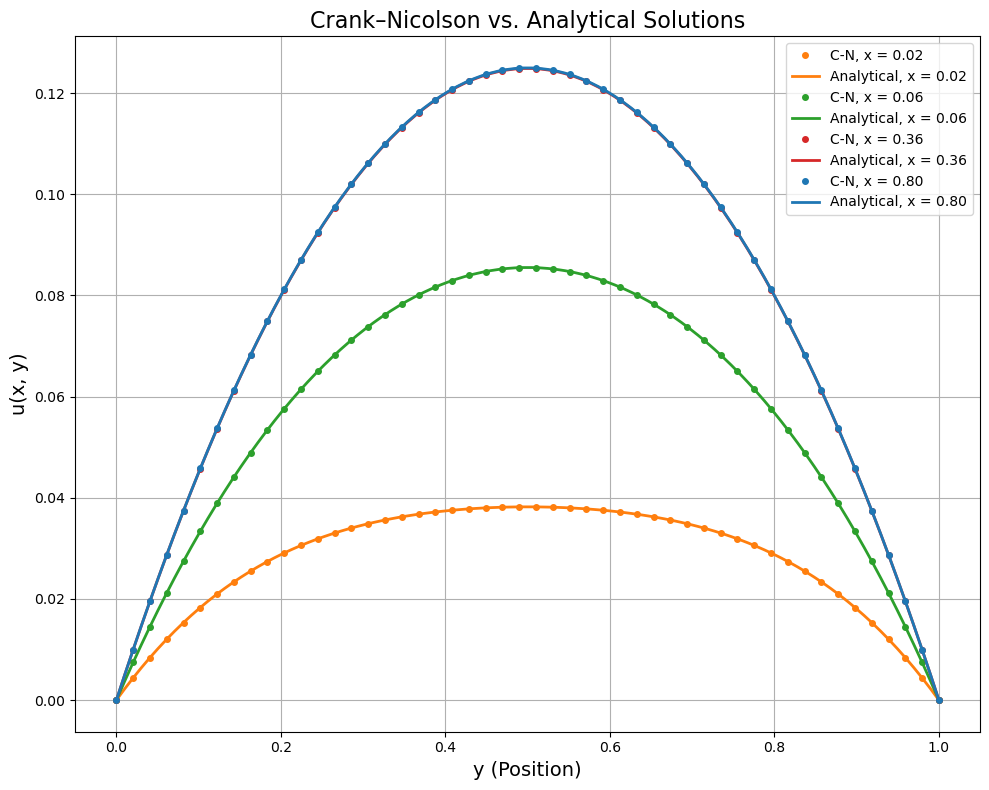

In [12]:
#plot
plt.figure(figsize=(10, 8))
colors = [ 'tab:orange', 'tab:green', 'tab:red','tab:blue']
markevery=2
for idx, n in enumerate(x_vals):
    x_now = n *dx
    label_text = f'x = {x_now:.2f}'
    
    #numerical
    plt.plot(y, u_store_numer[n], 'o', color=colors[idx], markersize=4, label=f'C-N, {label_text}')
    #analytical
    plt.plot(y_an, u_analytical[n], '-', color=colors[idx], linewidth=2, label=f'Analytical, {label_text}')
    
#plt.xlim(0.4,0.6) #toggle for zoomed in plots
#plt.ylim(0.11,0.13) #toggle for zoomed in plots
plt.xlabel('y (Position)', fontsize=14)
plt.ylabel('u(x, y)', fontsize=14)
plt.title('Crank–Nicolson vs. Analytical Solutions', fontsize=16)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

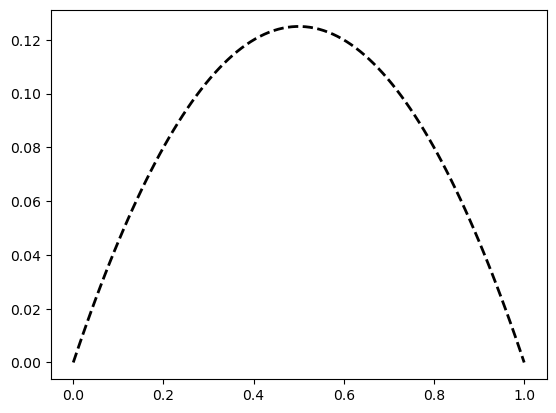

In [13]:
#plot 0.5*(y-y^2) throw this into loop above for analytical sol to show convergence to steady state, but also plot here for clarity
y_ss= np.linspace(0, 1, 100)
u_ss = 0.5*(y_ss-y_ss**2)
plt.plot(y_ss,u_ss,'k--',linewidth=2,label=r'$ \frac{1}{2}(y - y^2) $')